Importing the Libraries


In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and preprocessing


In [192]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [193]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [194]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [195]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [196]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [197]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [198]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

    1. Positive correlation
    2. Negative correlation

In [199]:
correlation = gold_data.corr()

<AxesSubplot:>

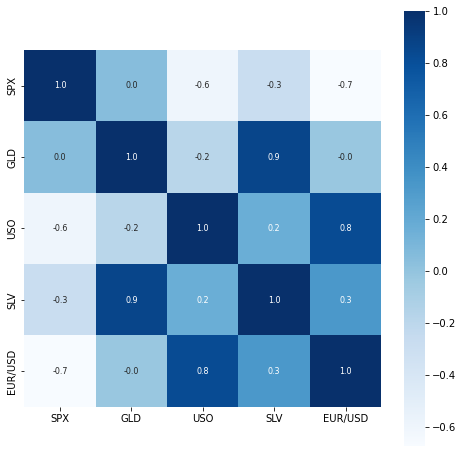

In [200]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [201]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Density'>

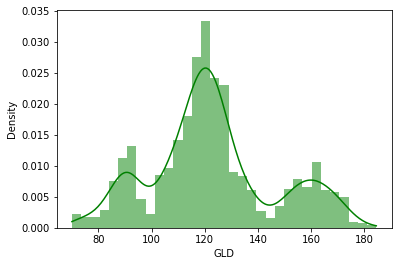

In [202]:
# checking the distribution of the GLD Price
sns.histplot(gold_data['GLD'],color='green',kde=True, stat="density", linewidth=0)

Splitting the features and Target

In [203]:
X = gold_data.drop(['Date','GLD'],axis=1)
X = X.values
Y = gold_data['GLD']

In [204]:
print(X)

[[1.44716003e+03 7.84700010e+01 1.51800000e+01 1.47169200e+00]
 [1.44716003e+03 7.83700030e+01 1.52850000e+01 1.47449100e+00]
 [1.41163000e+03 7.73099980e+01 1.51670000e+01 1.47549200e+00]
 ...
 [2.72307007e+03 1.44100000e+01 1.57400000e+01 1.19175300e+00]
 [2.73012988e+03 1.43800000e+01 1.55600000e+01 1.19311800e+00]
 [2.72578003e+03 1.44058000e+01 1.54542000e+01 1.18203300e+00]]


In [205]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the training data and test data

In [206]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model training : Random Forest Regressor

In [207]:
regressor = RandomForestRegressor(n_estimators=100)

In [208]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evalution

In [209]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [210]:
print(test_data_prediction)

[167.77579928  81.96259981 115.87779989 127.57880106 120.79160112
 154.72019787 150.17949873 126.13740041 117.54789882 126.20090067
 116.76730162 172.43190076 142.17439884 167.86499844 115.21620028
 118.07300013 138.47280303 170.0638003  159.86780354 156.6801988
 155.01040017 125.36990019 175.60489998 157.05340288 125.18710053
  93.65739983  77.8341003  120.60940003 119.25409995 167.51069977
  88.32810021 125.06979981  91.17690091 117.6820001  121.08599888
 136.51920096 115.57580113 115.35080062 147.14909959 107.19970126
 104.37640238  87.1672979  126.38100026 118.00050018 153.41699889
 119.75740029 108.24970021 107.93119842  93.16130074 127.103098
  75.00800009 113.63499936 121.37580013 111.40669937 119.00139898
 120.65759947 158.90900033 168.48550111 147.082697    85.84539875
  94.39030013  86.91999871  90.50690029 118.99510095 126.40670078
 127.4410001  168.60580012 122.2049994  117.27059922  98.2461003
 168.49780093 143.1229981  131.90910254 121.20260234 120.53759967
 119.62030045 

In [211]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9887912653527837


Compare the actual value and the predicted value in a plot

In [212]:
Y_test = list(Y_test)

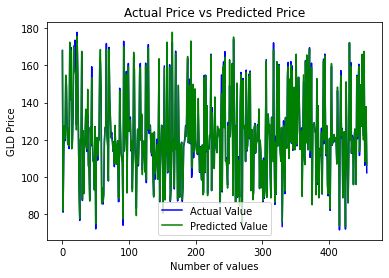

In [213]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [214]:
input_data = (1447.160034,78.370003,15.2850,1.474491)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print("The Price of the Gold is --> ", +float(prediction)) 
 

The Price of the Gold is -->  85.45039950999991
